(chap:cmds)= 
# Estimating XRB Masses with CMDs and CCDs

X-ray sources that are associated with point sources (i.e. stars) or compact star clusters and that are not flagged as SNR are considered genuine XRBs. The masses of their donor stars, then, are obtained by comparing their photometry across the filters available to us to stellar evolutionary models. The most useful tools for this process are color-magnitude diagrams (CMDs) and color-color diagrams (CCDs). The former is used to estimate the mass of isolated XRBs, while the latter allows us to approximate the most likely donor star mass of XRBs that exist within compact star clusters. 

```{figure} ../images/example_cmd.png
:name: fig-example-cmd
:width: 500px

An example of a color-magnitude diagram (CMD) using XRBs in M81. The color on the x-axis is calculated by subtracting the red magnitude by the green magnitude of the donor star. The models, which represent the evolution of a standard solar-metallicity star of a given mass, are derived from stellar evolutionary models for either ACS/WFC or WFC3/UVIS, so the observations taken of the donor stars should be done in at least 2 filters of the same intstrument (ACS or WFC3). 

Here, we see that there is a fairly even population of XRBs with visible donor stars measuring as low-mass (falling below the 3 solar mass line), intermediate-mass (falling above the 3 solar mass line), and high-mass high-mass (falling above the 8 solar mass line).
```

```{figure} ../images/example_ccd.png
:name: fig-example-ccd
:width: 400px

An example of a color-color diagram of XRB-hosting clusters in M81, compared to the standard color evolution of a cluster with solar-metallicity stars. 10 Myr and 400 Myr are denoted by black triangles; these are the ages that separate very young clusters, intermediate-age clusters, and globular clusters.
```


This chapter demonstrates how to pull the photometry of each point source or cluster, calculate their magnitudes, and compare their magnitudes and colors to the models included in the `XRBID` package. 

(sec:getphots)=
## Extracting photometry with `GetDaoPhots()`

Before we can create a CMD or CCD, we need to extract the photometry of each optical counterpart in each filter. Following the procedures in {ref}`sec:crossref`, the `DataFrame` named `DaoCleanMatch` now contains the name of each X-ray source (`CSC ID`), and the ID of each point source that falls within 2-$\sigma$ in each filter (`F555W ID`, `F435W ID`, `F814W ID`). To pull each point source's photometry from the appropriate filter data file, we use `XRBID.Sources.GetDaoPhots()`:

In [1]:
import numpy as np 
from XRBID.Sources import LoadSources, GetDaoPhots

# Ideally, you would run this on a DataFrame containing only point sources or clusters,
# but for this demonstration, I'll pull the info for all previously-identified 
# objects from the DaoClean() step of this guide
DaoCleanMatch = LoadSources("../testdata/M101_daoclean_matches.frame")

dist = 6.4e6 # units pc, from Chandar et al. 2020
dmod = 5 * np.log10(dist) - 5

DaoCleanPhots = GetDaoPhots(DaoCleanMatch, 
                            photfiles=["../testdata/photometry_M101_f555w_acs_sources.ecsv",
                                       "../testdata/photometry_M101_f435w_acs_sources.ecsv",
                                       "../testdata/photometry_M101_f814w_acs_sources.ecsv"],  
                            idheads=["F555W ID", "F435W ID", "F814W ID"], 
                            filters=["F555W", "F435W", "F814W"], 
                            magheader="aperture_mag_corr", dmod=dmod)
display(DaoCleanPhots)

Reading in sources from ../testdata/M101_daoclean_matches.frame...


Searching ../testdata/photometry_M101_f555w_acs_sources.ecsv


Searching ../testdata/photometry_M101_f435w_acs_sources.ecsv


Searching ../testdata/photometry_M101_f814w_acs_sources.ecsv


,X,Y,F555W ID,F435W ID,F814W ID,CSC ID,F555W,F435W,F814W
0,11331.067786,12533.111216,101364,143088.0,NaN,2CXO J140312.5+542056,-5.332633,-3.442610,NaN
1,11327.699419,12536.055626,101394,143125.0,148555.0,2CXO J140312.5+542056,-5.424267,-3.076202,-5.330721
2,11344.963322,12537.104504,101442,143189.0,148645.0,2CXO J140312.5+542056,-4.637474,-5.963856,-5.460896
3,11323.312878,12538.940418,101505,143293.0,NaN,2CXO J140312.5+542056,-3.497453,-2.484961,NaN
4,11332.293329,12541.942013,101528,143332.0,NaN,2CXO J140312.5+542056,-3.848583,-5.353711,NaN
...,...,...,...,...,...,...,...,...,...
1397,5443.850802,6942.044065,3143,4807.0,6523.0,2CXO J140346.1+541615,-4.622238,-3.893575,-4.334725
1398,3436.981758,10161.470633,52656,74953.0,71911.0,2CXO J140357.6+541856,-5.916386,-3.949940,-4.759476
1399,3445.711155,10162.184256,52713,74989.0,72017.0,2CXO J140357.6+541856,-4.243662,-5.567620,-6.196878
1400,6813.402988,4150.018831,68,105.0,100.0,2CXO J140338.3+541355,-4.000620,-3.714157,-4.834714


## Estimating Stellar Masses on a CMD

The mass of a star can be estimated by comparing their magnitudes and colors to stellar evolutionary models of stars of different masses. Below is an example of two blank CMDs, as plotted by `XRBID.CMDs.MakeCMD()`. Each line represents a different solar mass, with the color of the star evolving over time from left (where the main sequence lies) to right (towards redder overall colors).

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='F435W - F814W', ylabel='F814W'>)

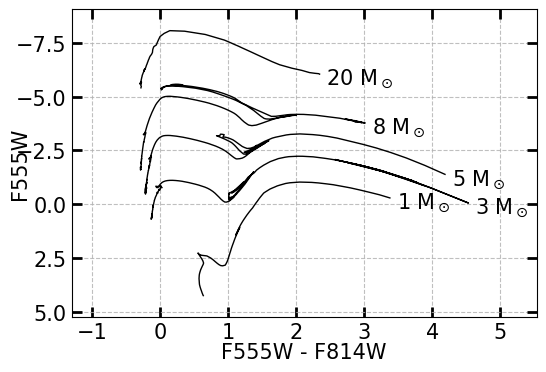

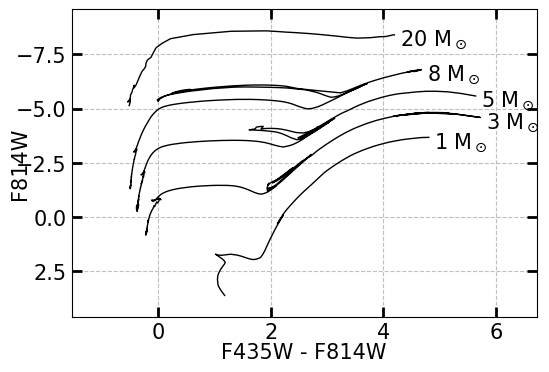

In [2]:
from XRBID.CMDs import MakeCMD

# The color and magnitude must be read in for the code to work. 
# The smaller wavelength should always be first when calculating colors.
MakeCMD(xcolor=["F555W", "F814W"], ycolor="F555W")
MakeCMD(xcolor=["F435W", "F814W"], ycolor="F814W")

To plot points on the CMD, read in a `DataFrame` containing the magnitudes of the sources, such as the `DataFrame` produced by GetDaoPhots. For simplicity the header containing the magnitudes should match the name of the filter represented. Because the models are instrument dependent, you should also read in the instrument the stars were observed with (ACS or WFC3). In the example below, I am simply printing *all* optical point sources identified within 2-$\sigma$ of the X-ray sources in my sample; in actuality, you would only want to plot the sources that you know are stars.

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='F555W - F814W', ylabel='F555W'>)

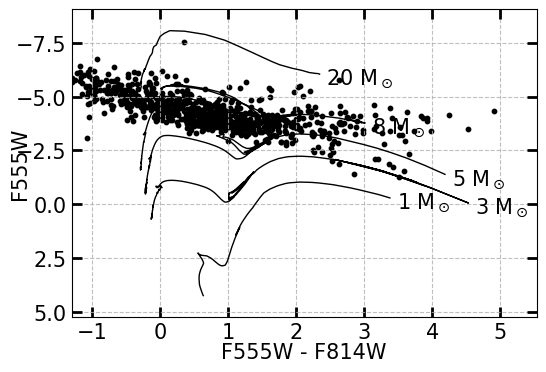

In [3]:
MakeCMD(DaoCleanPhots, xcolor=["F555W", "F814W"], ycolor="F555W", instrument="ACS")

In order to determine the best candidate donor star for a particular X-ray source, one should isolate that source and plot only its donor stars on a CMD. If there are several stars associated with a single source, it may not be possible to identify the exact XRB donor star, but in most cases it's not necessary: if, for an X-ray source only associated with stars, there exists at least one high-mass star within 2-$\sigma$, then that source is considered a high-mass XRB; if the source has a mix of low- and intermediate-mass stars, then that source is considered a low-mass XRB; and only if there are only intermediate-mass stars within 2-$\sigma$ should an XRB be classified as intermediate-mass. See {ref}`sec:selection` for more information. 

Below, I demonstrate the selection of the candidate donor stars of a single X-ray source and plot its CMD. In this case, the source has a mix of both high-mass and intermediate-mass stars within 2-$\sigma$. Therefore, based on the selection heirarchy we use, this XRB is defined as a high-mass XRB -- albeit with an unidentifable donor star. 

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='F555W - F814W', ylabel='F555W'>)

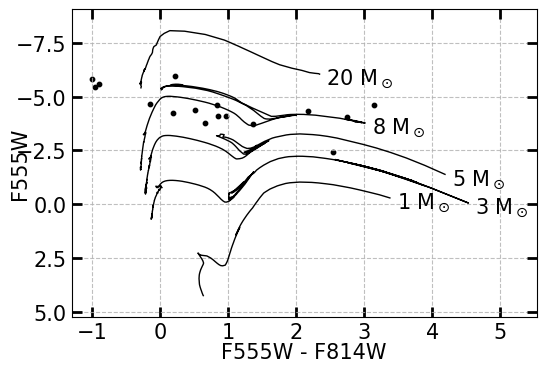

In [4]:
from XRBID.DataFrameMod import Find
TempSources = Find(DaoCleanPhots, "CSC ID = 2CXO J140312.7+541743")
MakeCMD(TempSources, xcolor=["F555W", "F814W"], ycolor="F555W")

## Aging Clusters on a CCD

```{important}
The cluster colors displayed in this example are currently not accurate, so the CCDs may look odd. The general methodology is still good; I am still examining the cluster colors to ensure nothing is going wrong with their calculation. 
```

If an X-ray source is associated with a cluster rather than a point source (i.e. star), then one should use `XRBID.CMDs.MakeCCD()` instead of `MakeCMD()`; this will plot the photometry of each source against an evolutionary model for a solar-mass cluster instead. We will use the estimated age of the cluster to determine the most likely mass category the XRB it contains may be: since high-mass stars are the most likely to form an XRB, then clusters that contain high-mass stars (i.e. young clusters) are most likely to host high-mass XRBs; on the other hand, globular clusters only contain low-mass stars, so their XRBs can only be low-mass XRBs. 

Another thing to keep in mind is that clusters are generally more extended than stars within an HST image, so you will need to pull the photometry from the extended source photometric file created by `RunPhots()` during the source identification and photometry stage (see {ref}`chap:photometry`). If you forget to pull the extended photometry, then the colors for your clusters will be incorrect, since the aperture correction assumes the majority of the light calls within the aperture radius used for the point source correction (in my case, 3 pixels), which *will likely not be the case for more extended sources like compact clusters*. 


In [5]:
from XRBID.DataFrameMod import BuildFrame
import pandas as pd

# Picking out a few clusters to plot
clusters = ["2CXO J140314.8+542110", "2CXO J140309.7+542114", 
            "2CXO J140311.7+542139", "2CXO J140319.2+542149"]

# The starid of that particular cluster, 
# since some XRBs have multiple optical counterparts in 2sig
starid = [2, 1, 2, 1]

Clusters = BuildFrame(headers=DaoCleanMatch.columns.tolist())

# Pulling the XRB ID and the coordinates of the cluster using the starid
for i in range(len(clusters)): 
    Temp = Find(DaoCleanMatch, ["CSC ID = " + clusters[i]]).loc[[starid[i]-1]]
    Clusters = pd.concat([Clusters, pd.DataFrame(Temp)])
Clusters = Clusters.reset_index().drop(columns='index')
display(Clusters)

ClustersPhots = GetDaoPhots(Clusters, 
                            photfiles=["../testdata/photometry_M101_f555w_acs_extended.ecsv",
                                       "../testdata/photometry_M101_f435w_acs_extended.ecsv",
                                       "../testdata/photometry_M101_f814w_acs_extended.ecsv"],  
                            idheads=["F555W ID", "F435W ID", "F814W ID"], 
                            filters=["F555W", "F435W", "F814W"], 
                            magheader="aperture_mag_corr", dmod=dmod)

,X,Y,F555W ID,F435W ID,F814W ID,CSC ID
0,10940.743222,12830.747261,107971,152163.0,160442.0,2CXO J140314.8+542110
1,11826.980271,12908.610779,109840,154725.0,163363.0,2CXO J140309.7+542114
2,11475.022185,13403.509145,119979,168995.0,178838.0,2CXO J140311.7+542139
3,10159.868518,13608.144007,124275,175144.0,184621.0,2CXO J140319.2+542149


Searching ../testdata/photometry_M101_f555w_acs_extended.ecsv
Searching ../testdata/photometry_M101_f435w_acs_extended.ecsv
Searching ../testdata/photometry_M101_f814w_acs_extended.ecsv


Because color is quite sensitive to reddening, it is recommended that one looks up the estimated extinction towards the coordinate of the cluster, which can be done by entering the coordinates in the [NASA/IPAC Extragalactic Database](https://ned.ipac.caltech.edu/extinction_calculator) and calculating it as B-V.

On this plot, as demonstrated below, the crucial ages of 10 Myr and 400 Myr are plotted, indicating the division between very young clusters (which are argued to most likely host high-mass XRBs), intermediate-age clusters (which may host intermediate-mass XRBs, though this is inconclusive at the moment), and globular clusters (which *only* contain low-mass XRBs). 

```{important}
Depending on the general size of the clusters in your galaxy, you may need to pull the photometry for a larger aperture size than the default of 3. This may also require you to redo the aperture photometry. I'm in the process of testing this and applying it to the `RunPhots` code, to make it easier to pull the photometry of clusters in the future. 
```

Plotting WITHOUT extinction correction:
Plotting reddening arrow for V-I vs. B-V
Plotting with extinction correction:
Plotting reddening arrow for V-I vs. B-V


<module 'matplotlib.pyplot' from '/Users/qianahunt/anaconda3/envs/jupyterbook/lib/python3.12/site-packages/matplotlib/pyplot.py'>

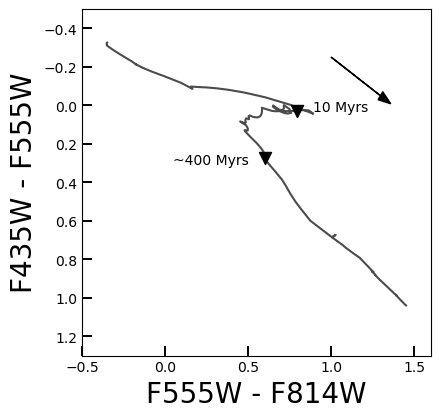

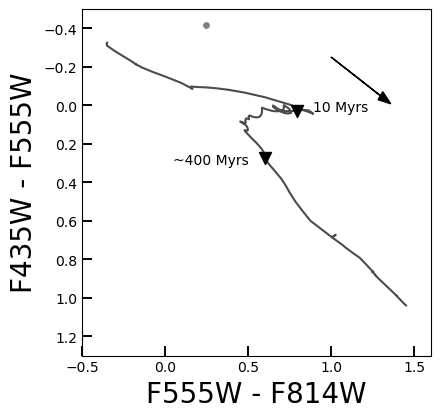

In [6]:
from XRBID.CMDs import MakeCCD

# Testing with and without extinction correction.
print("Plotting WITHOUT extinction correction:")
plt = MakeCCD(ClustersPhots, color="gray", E_BV=0.2, correct_ext=False)
print("Plotting with extinction correction:")
MakeCCD(ClustersPhots, color="gray", E_BV=0.2, correct_ext=True)